## Capstone Project – Predicting Customer Purchase Intentions

#### Imports libraries 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

#### Load the dataset

In [2]:
df = pd.read_csv("online_shoppers_intention.csv")

In [17]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
df.head().style.set_table_styles(
    [{'selector': 'table', 'props': [('border', '1px solid black')]},
     {'selector': 'th', 'props': [('border', '1px solid black'), ('font-weight', 'bold')]},
     {'selector': 'td', 'props': [('border', '1px solid black')]}]
)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.000000,0,0.000000,2,64.000000,0.000000,0.100000,0.000000,0.000000,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.000000,0,0.000000,2,2.666667,0.050000,0.140000,0.000000,0.000000,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.000000,0,0.000000,10,627.500000,0.020000,0.050000,0.000000,0.000000,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
df.shape

(12330, 18)

#### Data type information and missing values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [28]:
df.describe().style.set_table_styles(
    [{'selector': 'table', 'props': [('border', '1px solid black')]},
     {'selector': 'th', 'props': [('border', '1px solid black'), ('font-weight', 'bold')]},
     {'selector': 'td', 'props': [('border', '1px solid black')]}]
).format("{:.2f}")



,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.00,12330.00,12330.00,12330.00,12330.00,12330.00,12330.00,12330.00,12330.00,12330.00,12330.00,12330.00,12330.00,12330.00
mean,2.32,80.82,0.50,34.47,31.73,1194.75,0.02,0.04,5.89,0.06,2.12,2.36,3.15,4.07
std,3.32,176.78,1.27,140.75,44.48,1913.67,0.05,0.05,18.57,0.20,0.91,1.72,2.40,4.03
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00
25%,0.00,0.00,0.00,0.00,7.00,184.14,0.00,0.01,0.00,0.00,2.00,2.00,1.00,2.00
50%,1.00,7.50,0.00,0.00,18.00,598.94,0.00,0.03,0.00,0.00,2.00,2.00,3.00,2.00
75%,4.00,93.26,0.00,0.00,38.00,1464.16,0.02,0.05,0.00,0.00,3.00,2.00,4.00,4.00
max,27.00,3398.75,24.00,2549.38,705.00,63973.52,0.20,0.20,361.76,1.00,8.00,13.00,9.00,20.00


#### Distribution of the target variable (Revenue)

In [9]:
df['Revenue'].value_counts(normalize=True)

Revenue
False    0.845255
True     0.154745
Name: proportion, dtype: float64

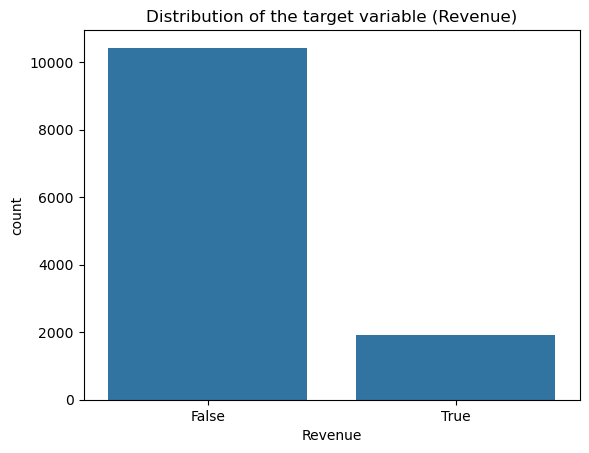

In [10]:
sns.countplot(x='Revenue', data=df)
plt.title("Distribution of the target variable (Revenue)")
plt.show()

#### Data Understanding

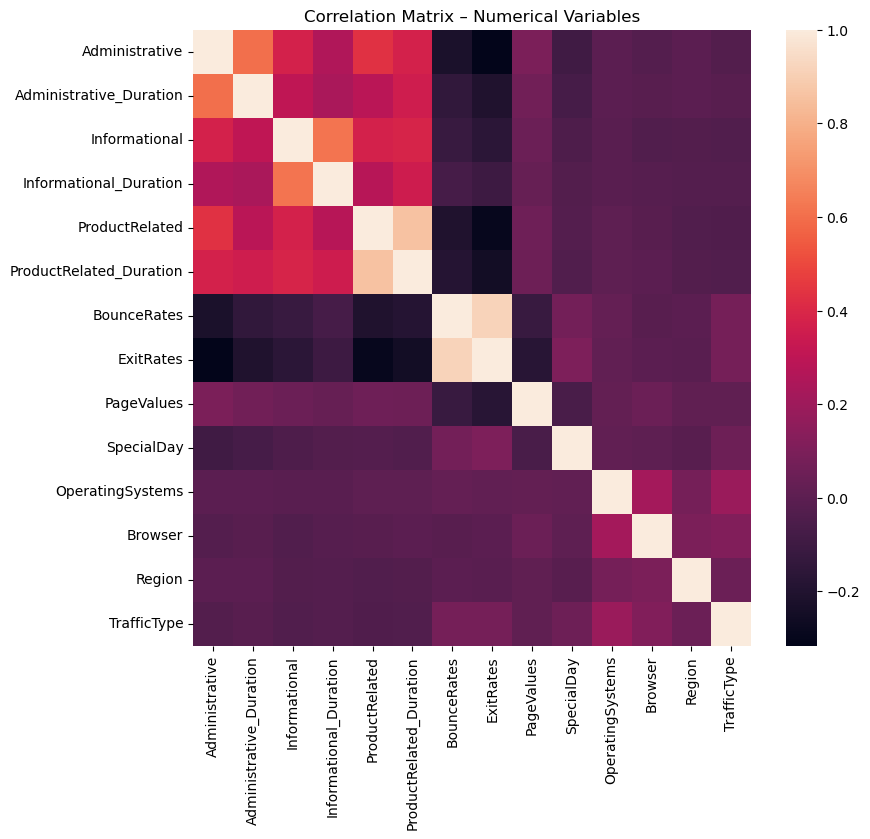

In [14]:
numeric_cols = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(9, 8))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=False)
plt.title("Correlation Matrix – Numerical Variables")
plt.show()

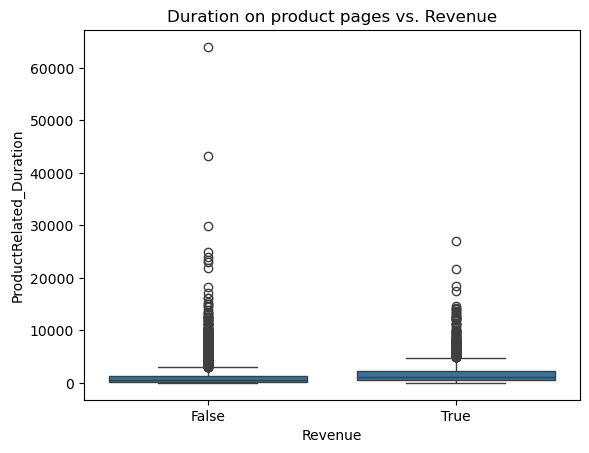

In [16]:
sns.boxplot(x='Revenue', y='ProductRelated_Duration', data=df)
plt.title("Duration on product pages vs. Revenue")
plt.show()

#### Data Preparation

In [17]:
data = df.copy()

data['Revenue'] = data['Revenue'].astype(int)  # True/False -> 1/0

cat_cols = data.select_dtypes(include=['object', 'bool']).columns
num_cols = data.select_dtypes(include=[np.number]).columns.drop('Revenue')

cat_cols, num_cols

(Index(['Month', 'VisitorType', 'Weekend'], dtype='object'),
 Index(['Administrative', 'Administrative_Duration', 'Informational',
        'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
        'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
        'OperatingSystems', 'Browser', 'Region', 'TrafficType'],
       dtype='object'))

In [18]:
data_encoded = pd.get_dummies(data, columns=cat_cols, drop_first=True)

data_encoded.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_True
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,False,False,False,False,False,False,False,False,True,True


#### Training and testing division

In [19]:
X = data_encoded.drop('Revenue', axis=1)
y = data_encoded['Revenue']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train.shape, X_test.shape

((9864, 26), (2466, 26))

#### Standardize numerical variables - Logistic Regression

In [31]:
scaler = StandardScaler()

X_train_num = scaler.fit_transform(X_train[num_cols])
X_test_num = scaler.transform(X_test[num_cols])

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[num_cols] = X_train_num
X_test_scaled[num_cols] = X_test_num

#### Modeling – Logistic Regression

In [32]:
log_reg = LogisticRegression(max_iter=1000)

log_reg.fit(X_train_scaled, y_train)
y_pred = log_reg.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred)) 

Accuracy: 0.8815896188158961
Precision: 0.7472527472527473
Recall: 0.35602094240837695
F1-score: 0.48226950354609927
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      2084
           1       0.75      0.36      0.48       382

    accuracy                           0.88      2466
   macro avg       0.82      0.67      0.71      2466
weighted avg       0.87      0.88      0.86      2466



#### Modeling - Random Forest

In [33]:
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    max_depth=None
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Accuracy (RF):", accuracy_score(y_test, y_pred_rf))
print("Precision (RF):", precision_score(y_test, y_pred_rf))
print("Recall (RF):", recall_score(y_test, y_pred_rf))
print("F1-score (RF):", f1_score(y_test, y_pred_rf))


Accuracy (RF): 0.8994322789943228
Precision (RF): 0.7359154929577465
Recall (RF): 0.5471204188481675
F1-score (RF): 0.6276276276276276


## Graphics

#### Distribution of the target variable (Revenue)

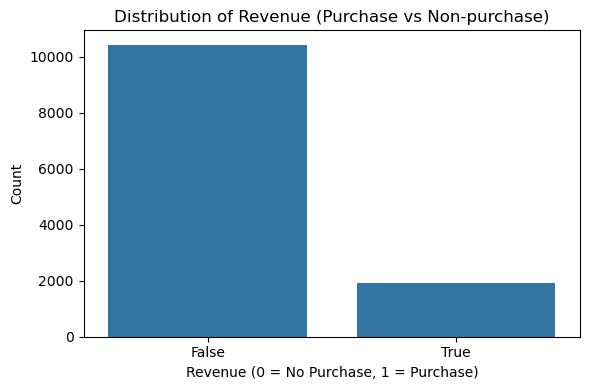

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribuição da variável alvo
plt.figure(figsize=(6,4))
sns.countplot(x='Revenue', data=df)
plt.title('Distribution of Revenue (Purchase vs Non-purchase)')
plt.xlabel('Revenue (0 = No Purchase, 1 = Purchase)')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('fig1_revenue_distribution.png', dpi=300)
plt.show()

#### Heatmap

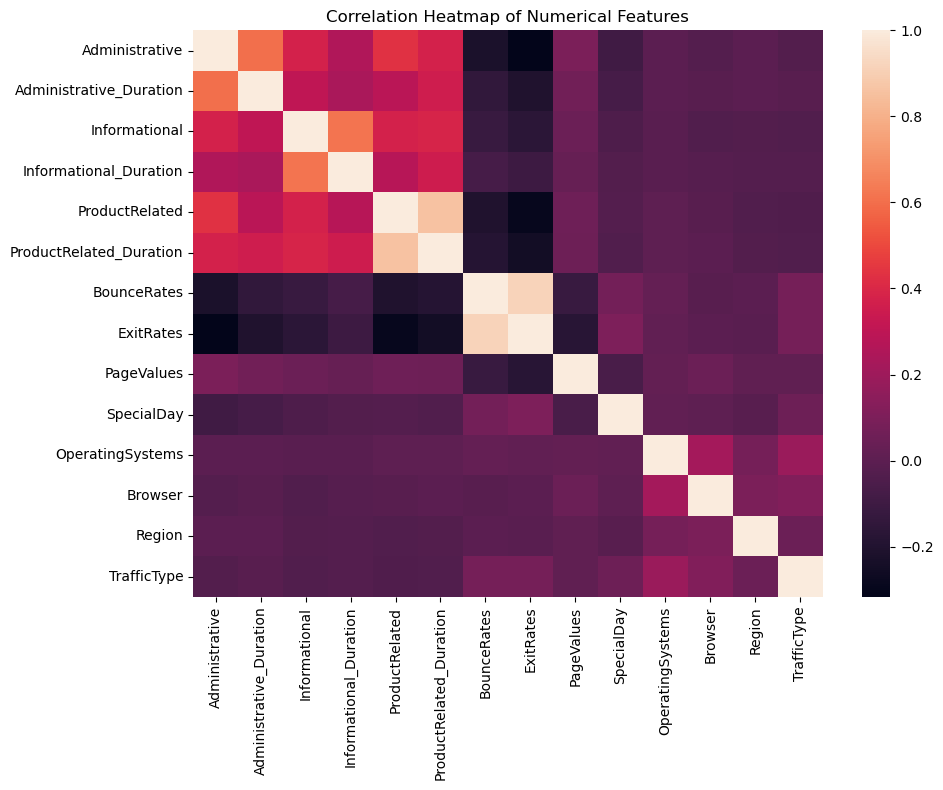

In [35]:
import numpy as np

numeric_cols = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(10,8))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=False)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.savefig('fig2_correlation_heatmap.png', dpi=300)
plt.show()

#### Boxplot: ProductRelated_Duration vs Revenue

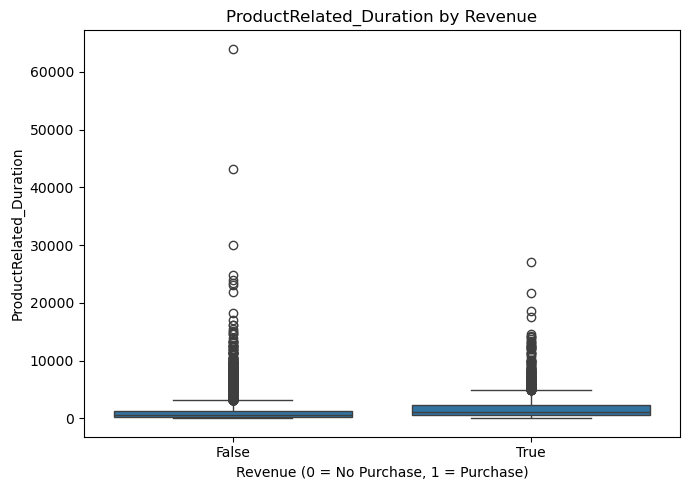

In [36]:
plt.figure(figsize=(7,5))
sns.boxplot(x='Revenue', y='ProductRelated_Duration', data=df)
plt.title('ProductRelated_Duration by Revenue')
plt.xlabel('Revenue (0 = No Purchase, 1 = Purchase)')
plt.ylabel('ProductRelated_Duration')
plt.tight_layout()
plt.savefig('fig3_product_duration_vs_revenue.png', dpi=300)
plt.show()

#### Boxplot: PageValues vs Revenue

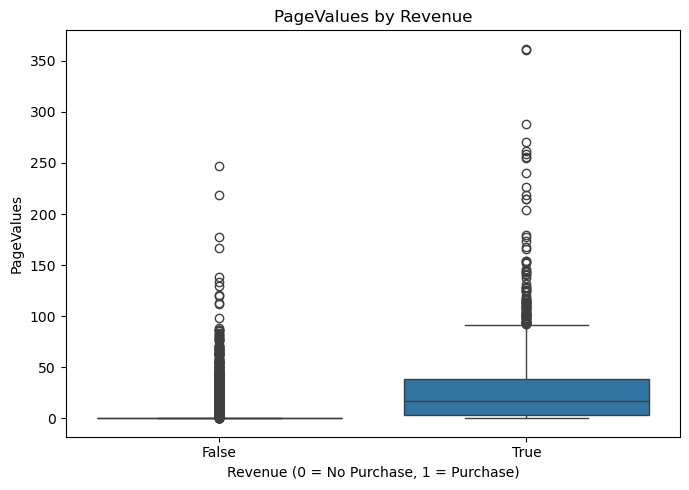

In [37]:
plt.figure(figsize=(7,5))
sns.boxplot(x='Revenue', y='PageValues', data=df)
plt.title('PageValues by Revenue')
plt.xlabel('Revenue (0 = No Purchase, 1 = Purchase)')
plt.ylabel('PageValues')
plt.tight_layout()
plt.savefig('fig4_pagevalues_vs_revenue.png', dpi=300)
plt.show()

#### Product Related Distribution to buyers and non-buyers

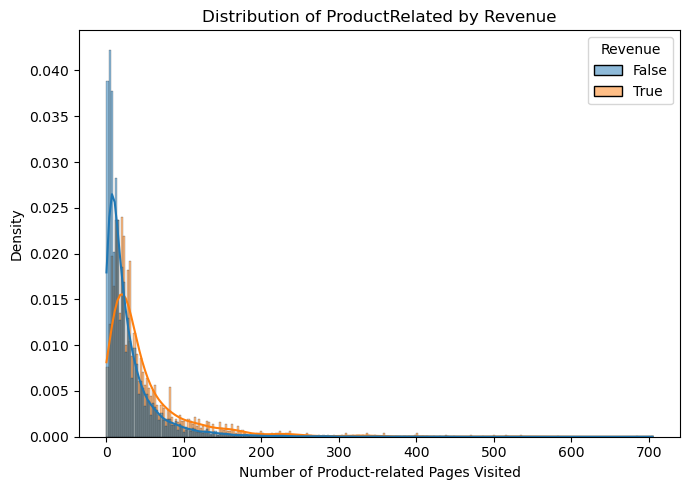

In [38]:
plt.figure(figsize=(7,5))
sns.histplot(data=df, x='ProductRelated', hue='Revenue', kde=True, stat='density', common_norm=False)
plt.title('Distribution of ProductRelated by Revenue')
plt.xlabel('Number of Product-related Pages Visited')
plt.ylabel('Density')
plt.tight_layout()
plt.savefig('fig5_productrelated_distribution.png', dpi=300)
plt.show()

#### Feature Importance - Random Forest

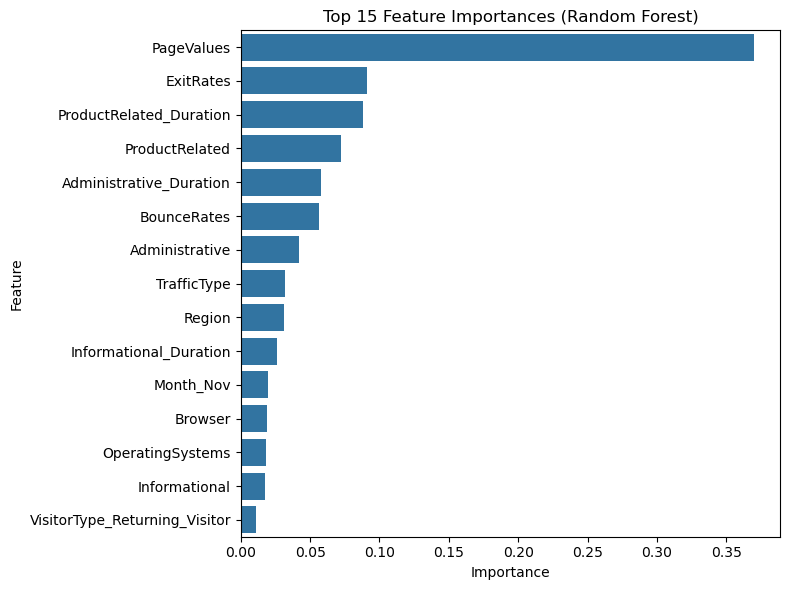

In [39]:
import pandas as pd

feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)[:15]  # Top 15

plt.figure(figsize=(8,6))
sns.barplot(x=feature_importances.values, y=feature_importances.index)
plt.title('Top 15 Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('fig6_rf_feature_importances.png', dpi=300)
plt.show()